# Group 1

## Uni : yz4661

## Name : Evan Zhou

## Github repository: https://github.com/DX0ZART/ML_Project_1 


## Submission Due Date: 10/10/2025

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Load datasets and merge them.
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [2]:
from sklearn.model_selection import train_test_split

# Load the dataset
whr_df = pd.read_csv('data/WHR_2023.csv')

# Inspect the first few rows to understand the structure
print(whr_df.columns)
whr_df.head(5)


Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [3]:
# Convert the regression target ('happiness_score') into classification labels
# We'll use quartiles to create 4 happiness categories: Very Low, Low, High, Very High

# Define quartiles
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'], 
                                       q=5, 
                                       labels=['Very Low', 'Low','Average', 'High', 'Very High'])

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
y_test_labels = y_test.astype('category').cat.codes   ## Complete in a similar manner as above

In [4]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

Write in the next cell what the y_train.astype('category').cat.codes line does. What is the difference between y_train_labels and y_train?

**What `y_train.astype('category').cat.codes` does:**
- Converts `y_train` to a Pandas *Categorical* type, then returns the integer code for each category.
- Each distinct class in `y_train` is mapped to an integer `0..K-1` (and `NaN` → `-1`).  
- The mapping follows the category order (by default lexicographic).

**Difference between `y_train_labels` and `y_train`:**
- `y_train`: original labels `'Very Low'`, `'Low'`,`'Average'`, `'High'`, `'Very High'`.
- `y_train_labels`: numeric-encoded version of those labels suitable for models needing integers.


<h3> Add new data

In [5]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("data/newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [6]:
# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.
# Also check which countries are common in both the datasets, and which type of merge will you perform for the best results.
# Hint: Look on the 'how' parameter of megre function of pandas.

# Check which countries are common in both datasets
common_countries = set(X_train['country']).intersection(set(countrydata['country_name']))
print(f"Common countries in training set: {common_countries}")

# Use left join to keep all rows from X_train and X_test
X_train = X_train.merge(countrydata, how='left',
                        left_on='country', right_on='country_name') \
                 .drop(columns='country_name')

X_test  = X_test.merge(countrydata, how='left',
                       left_on='country', right_on='country_name') \
                .drop(columns='country_name')

Common countries in training set: {'Indonesia', 'Peru', 'Zimbabwe', 'New Zealand', 'Liberia', 'Sweden', 'Ethiopia', 'Norway', 'Uganda', 'Spain', 'Bolivia', 'Lithuania', 'Hungary', 'South Korea', 'Iceland', 'Venezuela', 'Mongolia', 'Brazil', 'Albania', 'India', 'Saudi Arabia', 'Cambodia', 'Ukraine', 'Kosovo', 'Singapore', 'Jamaica', 'Poland', 'Denmark', 'Tajikistan', 'Belgium', 'Iraq', 'Ivory Coast', 'Jordan', 'Comoros', 'Kenya', 'Greece', 'Cyprus', 'Malta', 'United Kingdom', 'Mexico', 'Luxembourg', 'Slovenia', 'Italy', 'Uzbekistan', 'Egypt', 'Estonia', 'Finland', 'Togo', 'Afghanistan', 'China', 'Montenegro', 'Senegal', 'Israel', 'Malawi', 'Madagascar', 'Nigeria', 'Serbia', 'Namibia', 'Bulgaria', 'Burkina Faso', 'Zambia', 'Sri Lanka', 'Netherlands', 'Nepal', 'Iran', 'Chile', 'Bahrain', 'Honduras', 'Romania', 'Mali', 'Portugal', 'Austria', 'Colombia', 'Ghana', 'Mauritania', 'Slovakia', 'Australia', 'Niger', 'Mauritius', 'Guinea', 'Tanzania', 'Dominican Republic', 'El Salvador', 'Sierra L

In [7]:
X_train.head(1)

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,25570895.0,70.7,0.512149,65.515,10.34614,6.145955,1319.699397


In [8]:
X_train_ = X_train.copy()
X_test_ = X_test.copy()
y_train_ = y_train.copy()
y_test_ = y_test.copy()
y_train_labels_ = y_train_labels.copy()
y_test_labels_ = y_test_labels.copy()

## 1.  EDA

In [9]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

Your answer:

- We have two `text` columns: country and region.
- All the other columns are `numeric` (float64), such as GDP per capita, HDI, life expectancy, schooling years, etc.

Find out the number and percentage of missing values in the table per column

In [10]:
# Your code here:
missing_count = X_train.isnull().sum()
missing_percent = 100 * missing_count / len(X_train)

missing_table = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent.round(2)
}).sort_values(by='Missing Values', ascending=False)

missing_table[missing_table['Missing Values'] > 0]

,Missing Values,Percentage (%)
population_below_poverty_line,16,16.84
mean_years_of_schooling,7,7.37
expected_years_of_schooling,7,7.37
life_expectancy,7,7.37
gni,7,7.37
population,6,6.32
hdi,6,6.32


Plot the frequency distribution / histogram of some of the numerical features that you think are important

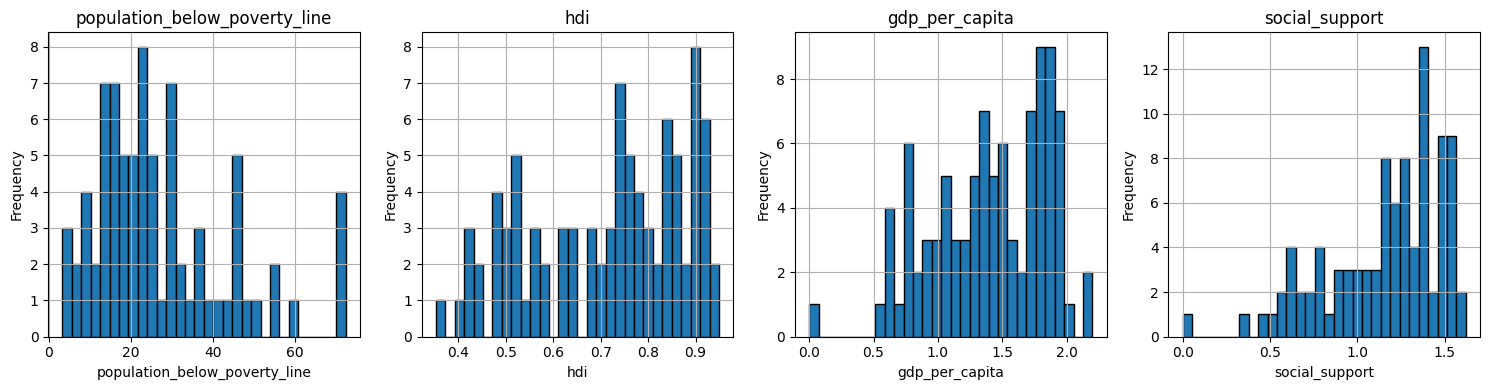

In [11]:
# Your plotting code here:

features = ["population_below_poverty_line", "hdi", 
            "gdp_per_capita", "social_support"]

plt.figure(figsize=(15, 4))

for i, col in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    X_train[col].hist(bins=30, edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Plot the categorical variables and their distribution

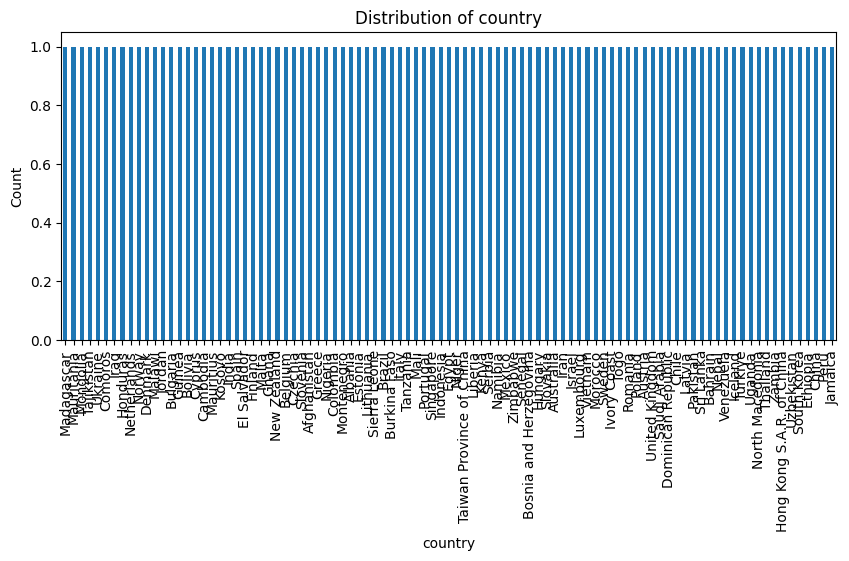

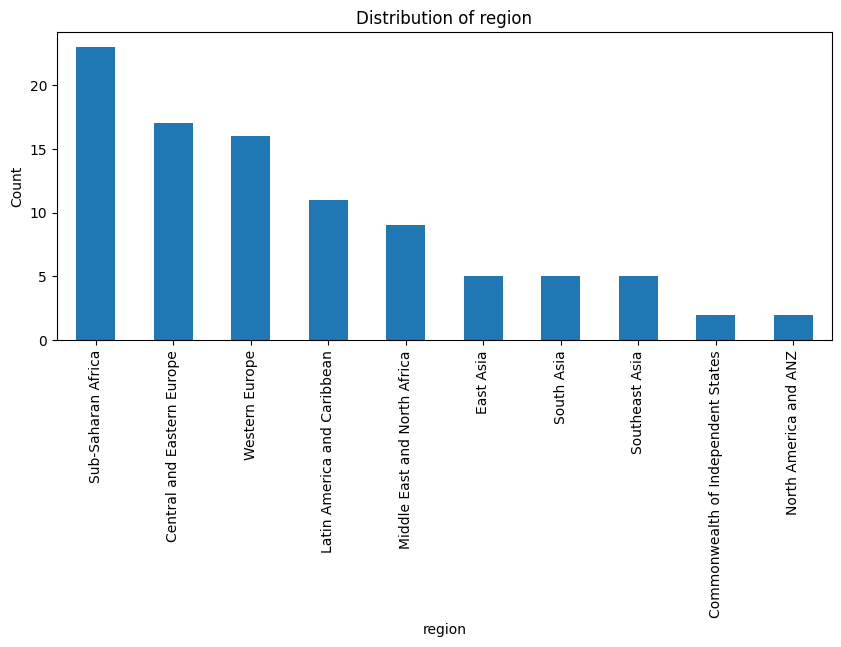

In [12]:
# Your plotting code here:

categorical_cols = ["country", "region"]

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    X_train[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90) 
    plt.show()

Perform feature correlation analysis to identify relationships between variables. Use Pearson, Spearman, or Kendall correlation coefficients to analyze feature dependencies.

In [13]:
# Your code here:

numeric_cols = X_train.select_dtypes(include='float64')

# Pearson (linear correlation)
pearson_corr = numeric_cols.corr(method='pearson')

# Spearman (rank-based, robust to outliers, non-linear monotonic relationships)
spearman_corr = numeric_cols.corr(method='spearman')

# Kendall (rank correlation, more strict than Spearman)
kendall_corr = numeric_cols.corr(method='kendall')

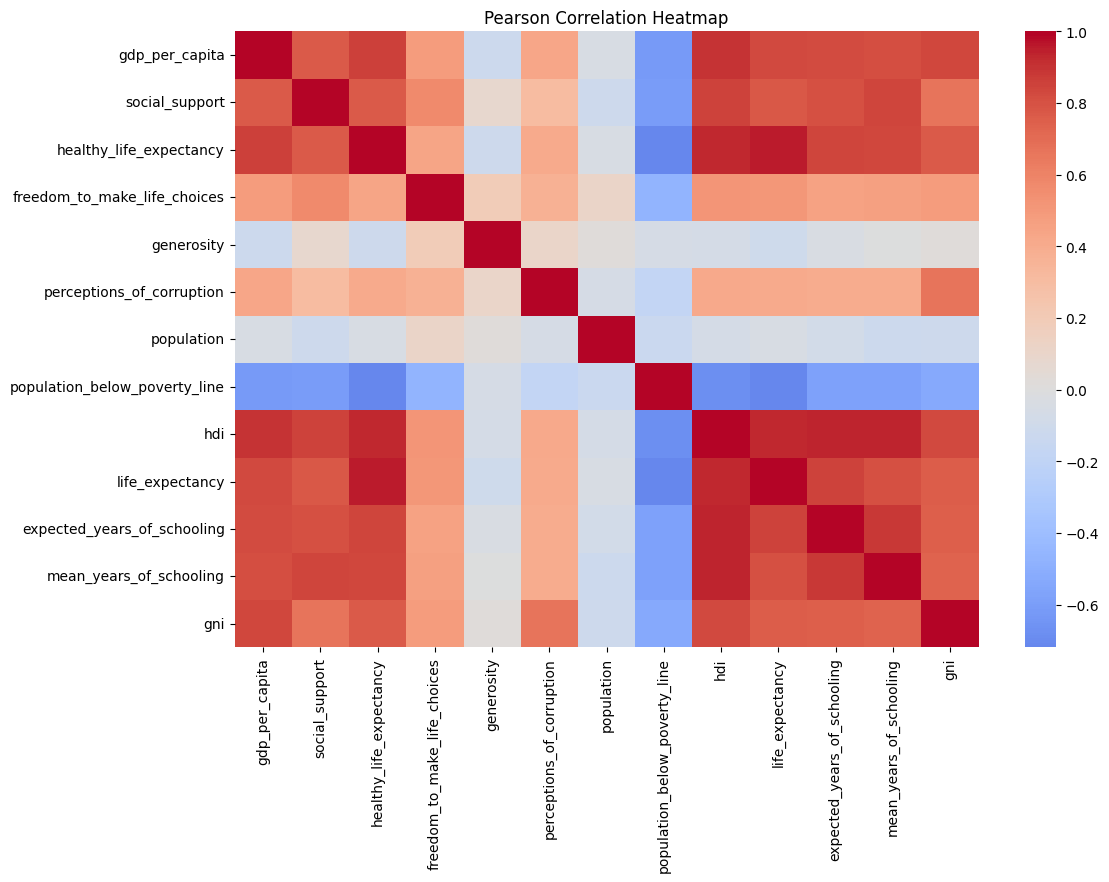

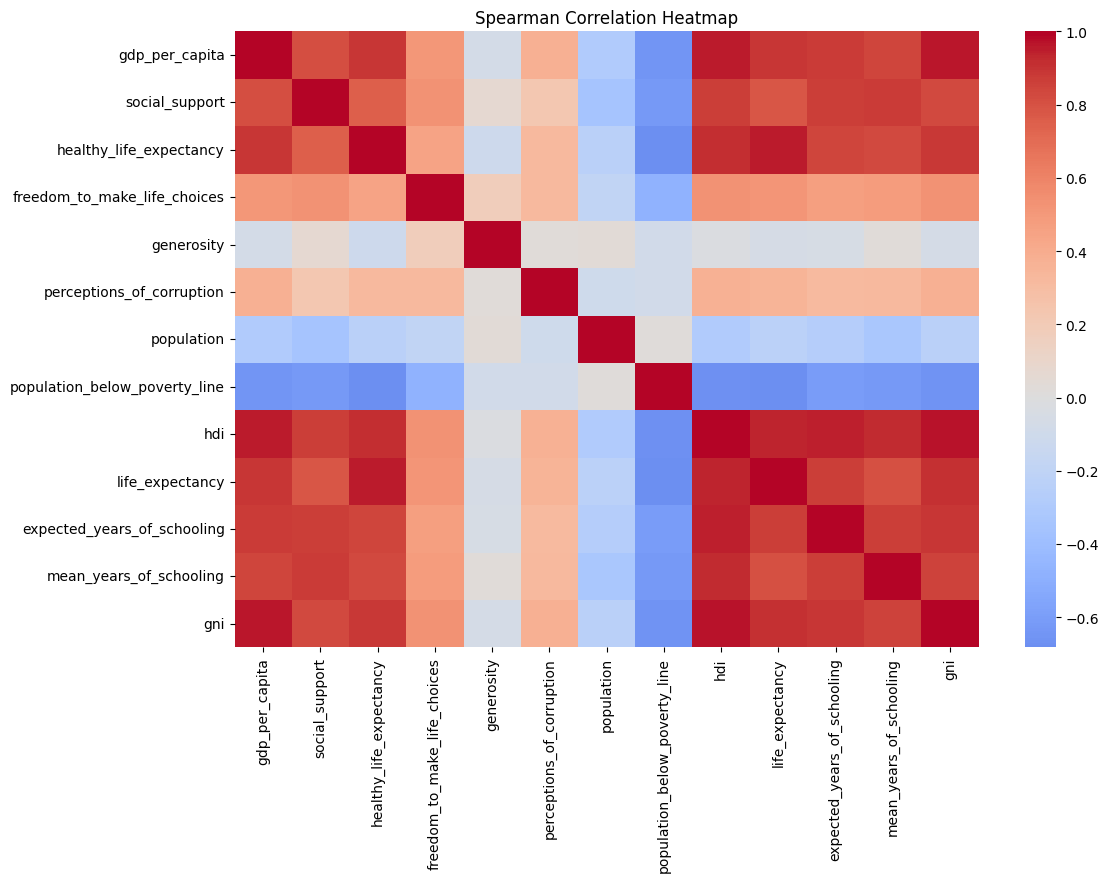

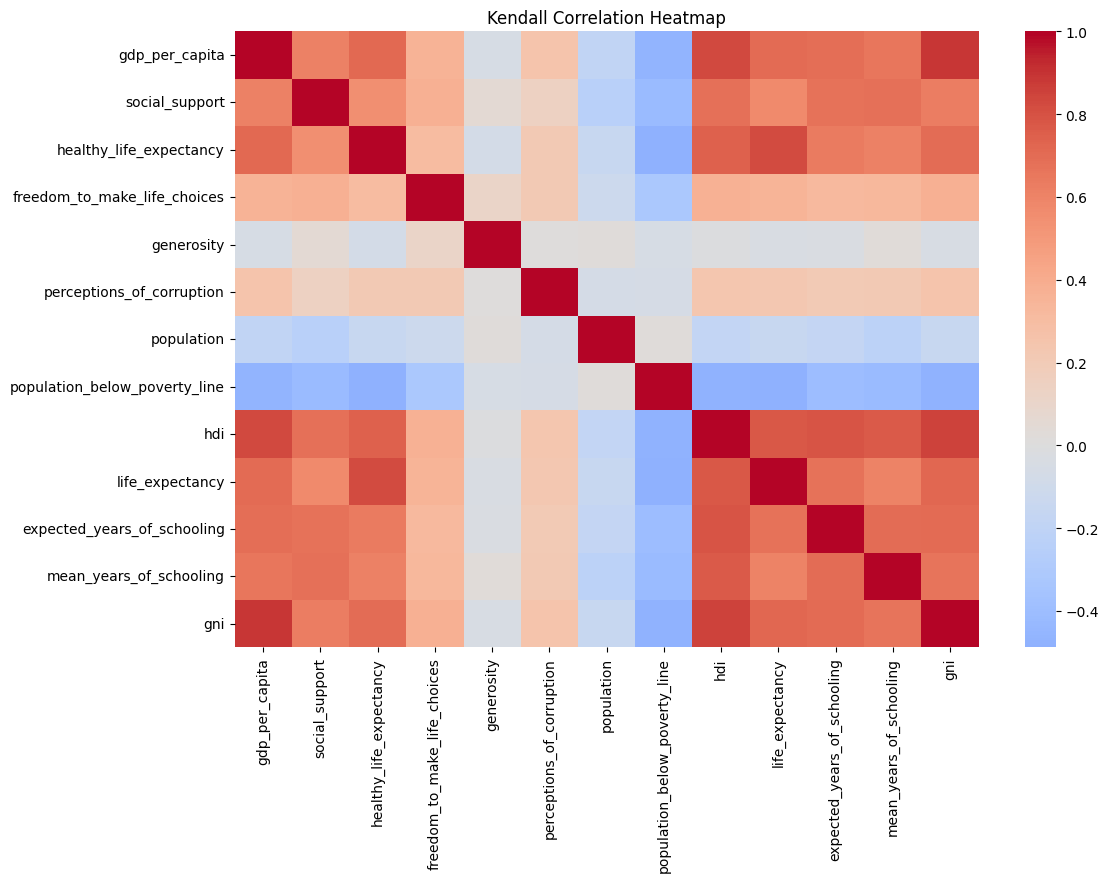

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(pearson_corr, cmap="coolwarm", center=0, annot=False)
plt.title("Pearson Correlation Heatmap")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(spearman_corr, cmap="coolwarm", center=0, annot=False)
plt.title("Spearman Correlation Heatmap")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(kendall_corr, cmap="coolwarm", center=0, annot=False)
plt.title("Kendall Correlation Heatmap")
plt.show()

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

In [15]:
# Your plotting code(s) here:
# Correlation of features with target variable

eda_df = X_train.copy()
eda_df.drop(columns = ["country", "region"], inplace=True)
eda_df['happiness_score'] = y_train_labels

corr_table = eda_df.corr(method="pearson")["happiness_score"].sort_values(ascending=False)
corr_table

happiness_score                  1.000000
perceptions_of_corruption        0.162115
population_below_poverty_line    0.079533
expected_years_of_schooling      0.024791
gni                              0.017251
mean_years_of_schooling         -0.001661
life_expectancy                 -0.004647
hdi                             -0.009183
generosity                      -0.010237
gdp_per_capita                  -0.016241
freedom_to_make_life_choices    -0.017659
healthy_life_expectancy         -0.024684
social_support                  -0.038729
population                      -0.264719
Name: happiness_score, dtype: float64

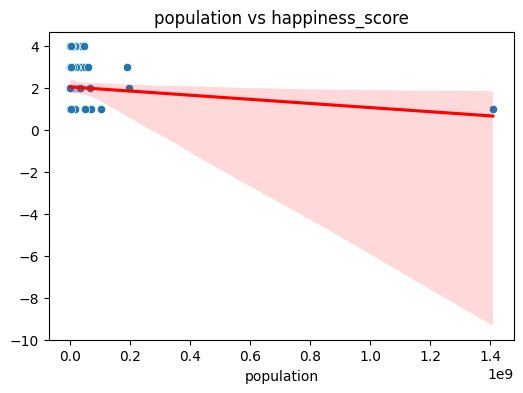

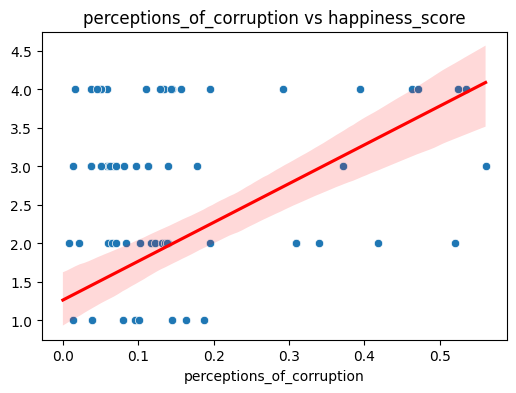

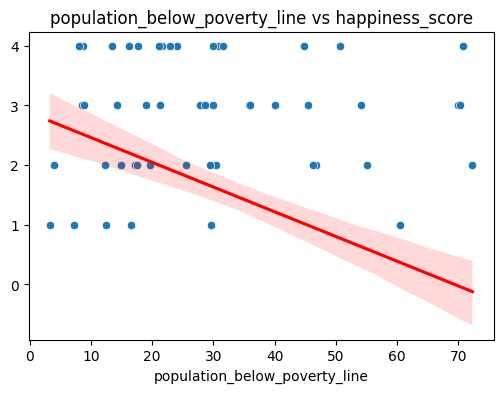

In [16]:
# Scatter plots for top correlated features
features_to_plot = ["population", "perceptions_of_corruption", "population_below_poverty_line"]

for feat in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=X_train, x=feat, y=y_train_labels)
    sns.regplot(data=X_train, x=feat, y=y_train_labels, scatter=False, color="red")  # add trend line
    plt.title(f"{feat} vs happiness_score")
    plt.show()

Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.

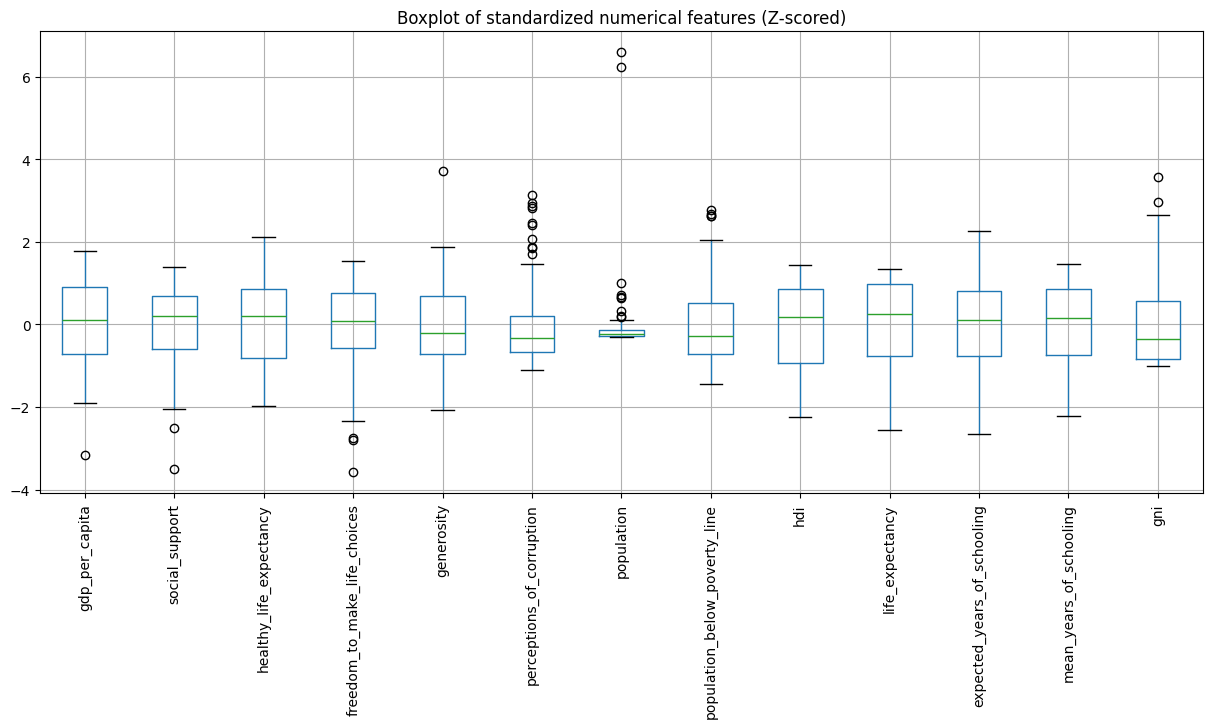

In [17]:
# Your code here:

# box plot
numeric_cols = eda_df.select_dtypes(include='float64').columns.drop(
    eda_df.columns.intersection(['happiness_score'])
)

# (x - mean) / std
eda_std = eda_df[numeric_cols].apply(lambda s: (s - s.mean()) / s.std(ddof=0))

plt.figure(figsize=(15, 6))
eda_std.boxplot(rot=90)
plt.title("Boxplot of standardized numerical features (Z-scored)")
plt.show()

In [18]:
# IQR method    
outlier_counts = {}
for col in numeric_cols:
    Q1 = eda_df[col].quantile(0.25)
    Q3 = eda_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_counts[col] = int(((eda_df[col] < lower) | (eda_df[col] > upper)).sum())

print("Number of outliers per column (IQR method):")
outlier_counts

Number of outliers per column (IQR method):


{'gdp_per_capita': 1,
 'social_support': 2,
 'healthy_life_expectancy': 0,
 'freedom_to_make_life_choices': 3,
 'generosity': 1,
 'perceptions_of_corruption': 10,
 'population': 9,
 'population_below_poverty_line': 4,
 'hdi': 0,
 'life_expectancy': 0,
 'expected_years_of_schooling': 0,
 'mean_years_of_schooling': 0,
 'gni': 2}

Write what you observed and your General comments on what should be done:

Your comments here

***Observations***
1. Most features like `healthy_life_expectancy`, `hdi`, `life_expectancy`, `expected_years_of_schooling`, `mean_years_of_schooling` show no detected outliers, suggesting those variables are relatively clean and well-behaved.
2. `GDP per capita`, `social support`,`generosity`, `GNI` each have a small number of outliers, which is expected.
3. `Freedom to make life choices` and `population_below_poverty_line` has slightly more anomalies, possibly due to survey responses in certain countries.
4. `Perceptions of corruption` and `population` show the highest number of outliers. This makes sense:
	- Population is highly skewed, as ountries like India and China are natural outliers.
	- Corruption perception may have strong extremes depending on political systems, so wide variation is expected.

⸻

***Comments / What should be done***
1. Some outliers like `China` / `India`’s `population`, or extreme corruption scores are genuine and carry important information. They should not be removed blindly.

2. Transform `skewed` variables:
	- For highly skewed features like population, GDP per capita, GNI, consider applying `log transformation` before modeling. This reduces the influence of extreme values and makes distributions more normal-like.
	- `Standardization` will help models that are sensitive to magnitude differences (like regression, KNN, or distance-based models).

## 2. Feature Engineering

In [19]:
X_train = X_train_.copy()
X_test = X_test_.copy()
y_train = y_train_.copy()
y_test = y_test_.copy()
y_train_labels = y_train_labels_.copy()
y_test_labels = y_test_labels_.copy()

Apply log transformations to normalize skewed data and improve model stability (If any). 

In [20]:
# Your code here:
log_cols = ["population", "gdp_per_capita", "gni", 
            "population_below_poverty_line", "perceptions_of_corruption"]

for col in log_cols:
    X_train[col + "_log"] = np.log1p(X_train[col]) 

X_train[[c for c in X_train.columns if c.endswith("_log")]].head()

,population_log,gdp_per_capita_log,gni_log,population_below_poverty_line_log,perceptions_of_corruption_log
0,17.056965,0.489806,7.185917,4.272491,0.125751
1,15.301692,0.741461,8.168561,3.465736,0.178146
2,14.939026,0.866680,9.254377,3.117950,0.056380
3,16.003957,0.679048,7.863876,3.481240,0.256191
4,17.604754,0.857814,8.904088,3.222868,0.015873


In [21]:
for col in log_cols:
    X_test[col + "_log"] = np.log1p(X_test[col])

Create at least one interaction feature to capture relationship between existing variables, enhancing predictive power.

In [22]:
# Your code here:
X_train["gdp_social_interaction"] = X_train["gdp_per_capita"] * X_train["social_support"]
X_test["gdp_social_interaction"] = X_test["gdp_per_capita"] * X_test["social_support"]

## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(include='float').columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), ## Is this good enough?
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['country', 'region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ]
    )

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

Your answer :

***Explanation of each step in the preprocessing pipeline:***

1. Pick which columns go down each branch, `Numeric` features OR `Categorical` features.

2. Build the `numeric pipeline`:

	***Change:***
	- Impute missing values → SimpleImputer(strategy='`median`'), because median is robust to skew/outliers
	- Scale → StandardScaler(), helps many algorithms converge and compare coefficients on the same scale.

3.	Build the `categorical pipeline`

	***Change:***
	- Impute missing categories → SimpleImputer(strategy='`most_frequent`') 
	- Encode → OneHotEncoder(handle_unknown='`ignore`'), creates 0/1 indicator columns; ignore prevents crashes when X_test contains categories unseen in training.

4.	Combine both branches with a ColumnTransformer


5.	Fit on training data only
	- `preprocessor.fit(X_train)` learns medians, means/stds, and the set of category levels from the training set to avoid data leakage.


In [24]:
# Write function to transform data with preprocessor

def _preprocessor(data):
    # data.drop(['country', 'region'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

Your Answer :
1.	preprocessor is the ColumnTransformer constructed with the numeric and categorical pipelines (imputer, scaler, one-hot, etc.).

2.	preprocess is what we get after calling preprocessor.fit(X_train). It’s the fitted transformer that now holds learned parameters (medians/means, scalers’ μ/σ, category vocabulary for OHE).

3.	preprocessor function is a Python function wrote named preprocessor(data) that (should) call the fitted object to transform new data. It’s just a wrapper function.

4.	preprocessed_data is the actual transformed feature matrix output.

In [25]:
# check shape of X data after preprocessing it using our new function
_preprocessor(X_train).shape

(95, 124)

## 4. Fit model on preprocessed data and save preprocessor function and model


In [26]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('prep', preprocess),
    ('rf', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced_subsample' 
    ))
])

# Your cell should have a score between 0-1 as output
model.fit(X_train, y_train_labels)
score = model.score(X_test, y_test_labels)
print(score)

0.5238095238095238


## 5. Generate predictions from X_test data and compare it with true labels in Y_test


In [27]:
#-- Generate predicted values (Model 1)
prediction_labels = model.predict(X_test)

## Write code to show model performance by comparing prediction_labels with true labels
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = y_test_labels

acc = accuracy_score(y_test_labels, prediction_labels)
print(f"Accuracy: {acc:.4f}")

print(classification_report(y_test_labels, prediction_labels))

Accuracy: 0.5238
              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.27      0.38      0.32         8
           2       0.56      0.62      0.59         8
           3       0.62      0.62      0.62         8
           4       0.86      0.67      0.75         9

    accuracy                           0.52        42
   macro avg       0.55      0.53      0.53        42
weighted avg       0.55      0.52      0.53        42



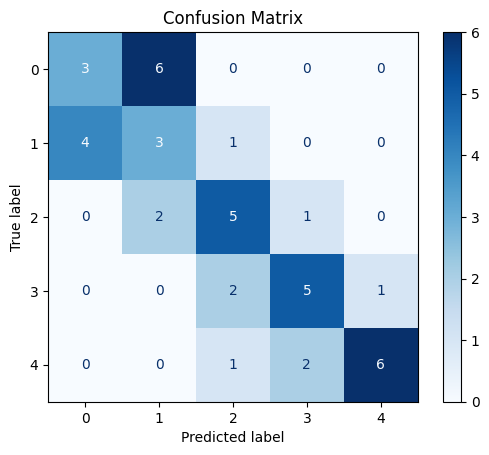

In [28]:
cm = confusion_matrix(y_test_labels, prediction_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## 6. Repeat the process with different parameters to improve the accuracy


In [29]:
# Train model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

model_2 = Pipeline(steps=[
    ('prep', preprocess),
    ('rf', RandomForestClassifier(
        n_estimators=500,          
        max_depth=10,            
        min_samples_split=5,   
        min_samples_leaf=3,    
        random_state=42,
        n_jobs=-1,
        class_weight='balanced_subsample'
    ))
])

# Your cell should have a score between 0-1 as output
model_2.fit(X_train, y_train_labels)
score = model_2.score(X_test, y_test_labels)
print(score)

0.6190476190476191


 What changes did you make, what do the parameters you changed control, and why does it improve performance?

***Changes***

1. n_estimators: 300 → 500

2. max_depth: None → 10

3. min_samples_split: default (2) → 5

4. min_samples_leaf: default (1) → 3

***Reasons***

1.	More trees generally give the model better stability and reduce variance.

2.	None means trees grow until all leaves are pure → can easily overfit. Limiting to 10 stops the tree from splitting too deeply.

3.	Raising to 5 means splits only happen when at least 5 samples are available, reducing overfitting to noise.

4.	Setting to 3 ensures each leaf represents at least 3 samples, smoothing predictions and improving stability.

In [30]:
#Evaluate Model 2:

#-- Generate predicted y values (Model 2)
prediction_labels = model_2.predict(X_test)

## Write code to show model performance by comparing prediction_labels with true labels
y_true = y_test_labels

acc = accuracy_score(y_test_labels, prediction_labels)
print(f"Accuracy: {acc:.4f}")

print(classification_report(y_test_labels, prediction_labels))

Accuracy: 0.6190
              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.45      0.62      0.53         8
           2       0.55      0.75      0.63         8
           3       0.67      0.50      0.57         8
           4       0.88      0.78      0.82         9

    accuracy                           0.62        42
   macro avg       0.64      0.62      0.62        42
weighted avg       0.65      0.62      0.62        42



Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

Your answer:

Yes, we should not guess manually, instead, use cross-validated hyperparameter search.

In [31]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

base_est = Pipeline(steps=[
    ('prep', preprocess),
    ('rf', RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        class_weight='balanced_subsample'
    ))
])

param_grid = {
    'rf__n_estimators': np.arange(200, 701, 100),    
    'rf__max_depth':    np.arange(6, 21, 2),        
    'rf__min_samples_split': np.arange(2, 11, 3),   
    'rf__min_samples_leaf':  np.arange(1, 7, 2),                             
}
# Use np.arange to create a sequence of numbers for each parameter's space you think should be searched

gridmodel = GridSearchCV(
    estimator=base_est,
    param_grid=param_grid,
    scoring='accuracy',   
    cv=5,
    n_jobs=-1,
    verbose=1
) # Read GridSearchCV docs and create an object with RandomForestClassifier as the model

#use model methods to fit score and predict model:
gridmodel.fit(X_train, y_train_labels)
score_test = gridmodel.score(X_test, y_test_labels)
y_pred = gridmodel.predict(X_test)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters:", gridmodel.best_params_)
print("test accuracy with best estimator: {:.3f}".format(score_test))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
best mean cross-validation score: 0.568
best parameters: {'rf__max_depth': np.int64(6), 'rf__min_samples_leaf': np.int64(1), 'rf__min_samples_split': np.int64(2), 'rf__n_estimators': np.int64(200)}
test accuracy with best estimator: 0.595


In [32]:
#Submit Model 3:

#-- Generate predicted values
model_3 = Pipeline(steps=[
    ('prep', preprocess),
    ('rf', RandomForestClassifier(
        n_estimators=200,          
        max_depth=6,            
        min_samples_split=2,   
        min_samples_leaf=1,    
        random_state=42,
        n_jobs=-1,
        class_weight='balanced_subsample'
    ))
])

# Your cell should have a score between 0-1 as output
model_3.fit(X_train, y_train_labels)
score = model_3.score(X_test, y_test_labels)
print(score)

prediction_labels = model_2.predict(X_test)

## Write code to show model performance by comparing prediction_labels with true labels
y_true = y_test_labels

acc = accuracy_score(y_test_labels, prediction_labels)
print(f"Accuracy: {acc:.4f}")

print(classification_report(y_test_labels, prediction_labels))

0.5952380952380952
Accuracy: 0.6190
              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.45      0.62      0.53         8
           2       0.55      0.75      0.63         8
           3       0.67      0.50      0.57         8
           4       0.88      0.78      0.82         9

    accuracy                           0.62        42
   macro avg       0.64      0.62      0.62        42
weighted avg       0.65      0.62      0.62        42



In [33]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

# 1) Define candidate models (with sane baseline params)
candidates = {
    "KNN": KNeighborsClassifier(n_neighbors=7),            

    "Bagging": BaggingClassifier(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
    "GradientBoosting": GradientBoostingClassifier(
        learning_rate=0.08, n_estimators=250, max_depth=3, random_state=42
    ),
}

# 2) Build pipelines: preprocessor -> model
pipelines = {
    name: Pipeline([('prep', preprocessor), ('clf', model)])
    for name, model in candidates.items()
}

# 3) Fit, predict, and evaluate
for name, pipe in pipelines.items():
    print(f"\n=== {name} ===")
    pipe.fit(X_train, y_train_labels)

    # CV (optional but recommended)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipe, X_train, y_train_labels, cv=cv, scoring='accuracy', n_jobs=-1)
    print(f"CV accuracy: mean={cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

    # Test performance
    prediction_labels = pipe.predict(X_test)
    acc = accuracy_score(y_test_labels, prediction_labels)
    print(f"Test accuracy: {acc:.3f}")

    # Short report
    print("Classification report (test):")
    print(classification_report(y_test_labels, prediction_labels, digits=3))


=== KNN ===
CV accuracy: mean=0.537 ± 0.052
Test accuracy: 0.524
Classification report (test):
              precision    recall  f1-score   support

           0      0.667     0.222     0.333         9
           1      0.417     0.625     0.500         8
           2      0.357     0.625     0.455         8
           3      0.500     0.375     0.429         8
           4      1.000     0.778     0.875         9

    accuracy                          0.524        42
   macro avg      0.588     0.525     0.518        42
weighted avg      0.600     0.524     0.522        42


=== Bagging ===
CV accuracy: mean=0.547 ± 0.098
Test accuracy: 0.524
Classification report (test):
              precision    recall  f1-score   support

           0      0.556     0.556     0.556         9
           1      0.250     0.250     0.250         8
           2      0.455     0.625     0.526         8
           3      0.571     0.500     0.533         8
           4      0.857     0.667     0.750 

Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

Your answer:

***KNeighborsClassifier*** :   `n_neighbors`=7
- This sets how many neighbors are used to decide a class label. Larger k smooths predictions and reduces variance, but too large can underfit.
- Worked because after scaling, KNN can capture local structure while avoiding overfitting to single noisy neighbors.


***BaggingClassifier***: `n_estimators`=200, `random_state`=42, `n_jobs`=-1
- Bagging reduces variance by averaging over many learners; even a simple base estimator can improve.

***GradientBoostingClassifier***: `learning_rate`=0.08, `n_estimators`=250, `max_depth`=3
- This setup works because boosting focuses each tree on the mistakes of the previous ones, so shallow, regularized trees combined with a moderate learning rate often generalize better.

## 7. Basic Deep Learning

In [34]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=_preprocessor(X_train).shape[1]

keras_model = Sequential([
    Dense(128, input_shape=(feature_count,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax') 
]) ## Define a Neural Network Model with 5 layers 128->64->64->32->(?)
#Use Softmax activation in last layer. How many neurons should there be in the last layer?

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
from keras.utils import to_categorical

y_train_onehot = to_categorical(y_train_labels, num_classes=5)
y_test_onehot  = to_categorical(y_test_labels,  num_classes=5)
# Fitting the NN to the Training set
history = keras_model.fit(_preprocessor(X_train), y_train_onehot, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25, verbose=0)

2025-09-30 21:00:21.557548: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-30 21:00:21.913929: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-30 21:00:28.842078: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/dx/disk_f/BaiduSyncdisk/1_Classes/3_25Fall/3_ML/Project_1/.venv/lib/python3.12/site-p

Which activations did you use in the middle layers? Why was softmax used in the last layer?

***Your answer:***

ReLU (Rectified Linear Unit)

Converts raw outputs (logits) into a probability distribution (all probabilities sum to 1).

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

***Your answer:***

- If training accuracy keeps increasing but validation accuracy drops, the model is overfitting.
- If both training and validation curves flatten out early, continuing to 300 won’t add value.


Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

***Your answer:***

- The problem is multi-class classification, and categorical_crossentropy is the standard loss function for multi-class problems with one-hot encoded targets. It measures how far the predicted probability distribution (from the Softmax layer) is from the true one-hot distribution.
- SGD is the simplest optimizer, and it works better on large scale datasets.


Can you try getting the model's training history out and plotting the curves?

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


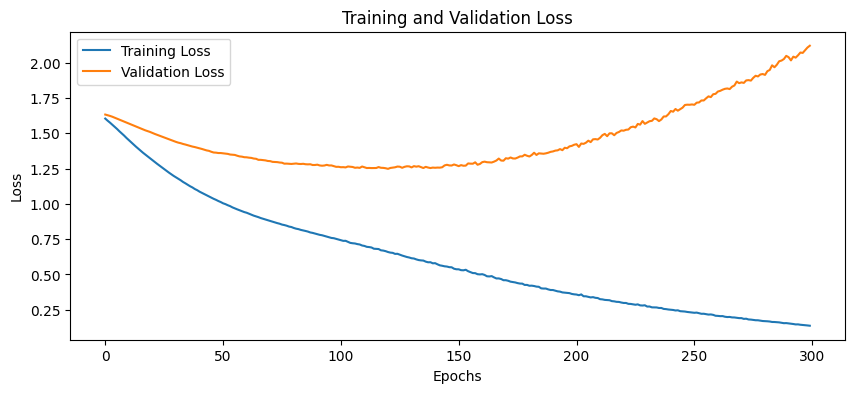

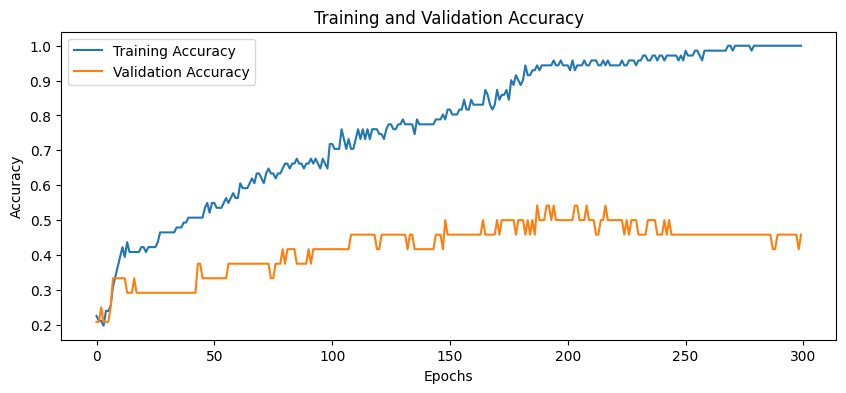

In [35]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)

history_dict = history.history
print(history_dict.keys())  # shows what metrics were tracked (loss, accuracy, val_loss, val_accuracy, ...)

# Plot loss curves
plt.figure(figsize=(10,4))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure(figsize=(10,4))
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
#-- Generate predicted y values
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# 1) Predict probabilities
y_pred_probs = keras_model.predict(_preprocessor(X_test))

# 2) Convert to class indices (0–4)
prediction_column_index = np.argmax(y_pred_probs, axis=1)

# 3) Compare with true labels (make sure they are integer-encoded)
y_true = y_test_labels.to_numpy().astype("int32").ravel()

# 4) Evaluate performance
print("Accuracy:", accuracy_score(y_true, prediction_column_index))
print(classification_report(y_true, prediction_column_index))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Accuracy: 0.5714285714285714
              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.36      0.50      0.42         8
           2       0.67      0.50      0.57         8
           3       0.56      0.62      0.59         8
           4       0.89      0.89      0.89         9

    accuracy                           0.57        42
   macro avg       0.58      0.57      0.57        42
weighted avg       0.58      0.57      0.57        42



Implement regularization techniques such as Dropout and Batch Normalization to improve model generalization and observe change in performance. <br>
Note: Observe the training and testing loss and accuracy.

In [37]:
# Your code here:
from keras.layers import Dense, Dropout, BatchNormalization, Activation

feature_count = _preprocessor(X_train).shape[1]

keras_model_2 = Sequential([
    Dense(128, input_shape=(feature_count,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(5, activation='softmax')  
])

# Compile model (Adam often converges faster than SGD)
keras_model_2.compile(
    loss='categorical_crossentropy', 
    optimizer='sgd',
    metrics=['accuracy']
)

# Train
history_2 = keras_model_2.fit(
    _preprocessor(X_train), 
    y_train_onehot, 
    batch_size=20,
    epochs=100,
    validation_split=0.25,
    verbose=0
)

/home/dx/disk_f/BaiduSyncdisk/1_Classes/3_25Fall/3_ML/Project_1/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


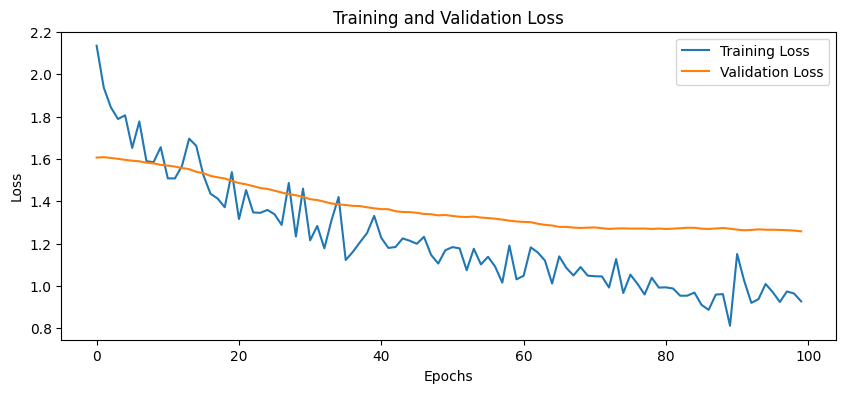

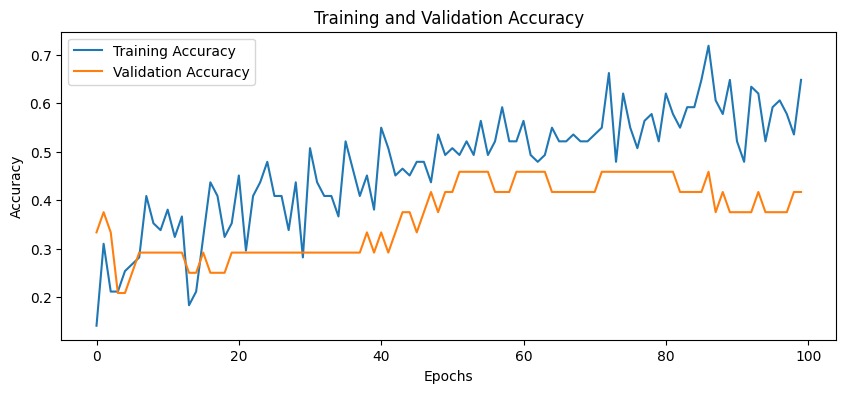

In [38]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)

history_dict = history_2.history
print(history_dict.keys())  # shows what metrics were tracked (loss, accuracy, val_loss, val_accuracy, ...)

# Plot loss curves
plt.figure(figsize=(10,4))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure(figsize=(10,4))
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Your comments about the change in performance

1. Without regularization: model overfits badly → high training acc, poor validation acc.
2. With Dropout + BatchNorm: model trains more slowly, but validation performance is more stable.

Experiment with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) to observe their impact on model performance.

In [39]:
# Your code here:
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping

Xtr = _preprocessor(X_train)
Xte = _preprocessor(X_test)
ytr = y_train_onehot
yte = y_test_labels

feature_count = Xtr.shape[1]
n_classes = 5

def build_mlp(activation="relu", dropout=0.3):
    act = activation.lower()
    use_leaky = (act == "leakyrelu" or act == "leaky_relu" or act == "leaky-relu")
    model = Sequential()
    # block 1
    model.add(Dense(128, input_shape=(feature_count,)))
    model.add(BatchNormalization())
    if use_leaky:
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(Activation(act))
    model.add(Dropout(dropout))
    # block 2
    model.add(Dense(64))
    model.add(BatchNormalization())
    if use_leaky:
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(Activation(act))
    model.add(Dropout(dropout))
    # block 3
    model.add(Dense(64))
    model.add(BatchNormalization())
    if use_leaky:
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(Activation(act))
    model.add(Dropout(dropout))
    # block 4
    model.add(Dense(32))
    model.add(BatchNormalization())
    if use_leaky:
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(Activation(act))
    model.add(Dropout(dropout))
    # output
    model.add(Dense(n_classes, activation="softmax"))
    model.compile(
        loss="categorical_crossentropy",   # integer labels
        optimizer="sgd",
        metrics=["accuracy"]
    )
    return model

# ---------- train & compare ----------
results = {}
patience = 15
for act in ["relu", "leaky_relu", "tanh", "sigmoid"]:
    print(f"\n=== Activation: {act} ===")
    m = build_mlp(act, dropout=0.3)
    es = EarlyStopping(monitor="val_accuracy", mode="max", patience=patience,
                       restore_best_weights=True, verbose=0)
    hist = m.fit(
        Xtr, ytr,
        epochs=200,
        batch_size=32,
        validation_split=0.25,
        callbacks=[es],
        verbose=0
    )
    # evaluate
    val_best = max(hist.history["val_accuracy"])
    ypred = np.argmax(m.predict(Xte, verbose=0), axis=1)
    test_acc = accuracy_score(yte, ypred)
    results[act] = {"val_acc": float(val_best), "test_acc": float(test_acc)}
    print(f"Best Val Acc: {val_best:.3f} | Test Acc: {test_acc:.3f}")

# nicely view results
pd.DataFrame(results).T.sort_values("val_acc", ascending=False)


=== Activation: relu ===


/home/dx/disk_f/BaiduSyncdisk/1_Classes/3_25Fall/3_ML/Project_1/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Val Acc: 0.417 | Test Acc: 0.476

=== Activation: leaky_relu ===


/home/dx/disk_f/BaiduSyncdisk/1_Classes/3_25Fall/3_ML/Project_1/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/dx/disk_f/BaiduSyncdisk/1_Classes/3_25Fall/3_ML/Project_1/.venv/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Best Val Acc: 0.458 | Test Acc: 0.524

=== Activation: tanh ===


/home/dx/disk_f/BaiduSyncdisk/1_Classes/3_25Fall/3_ML/Project_1/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Val Acc: 0.458 | Test Acc: 0.381

=== Activation: sigmoid ===


/home/dx/disk_f/BaiduSyncdisk/1_Classes/3_25Fall/3_ML/Project_1/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Val Acc: 0.167 | Test Acc: 0.190


,val_acc,test_acc
leaky_relu,0.458333,0.523810
tanh,0.458333,0.380952
relu,0.416667,0.476190
sigmoid,0.166667,0.190476


## 8. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.  

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

We will now apply SHAP to visualize and interpret our model’s feature contributions.


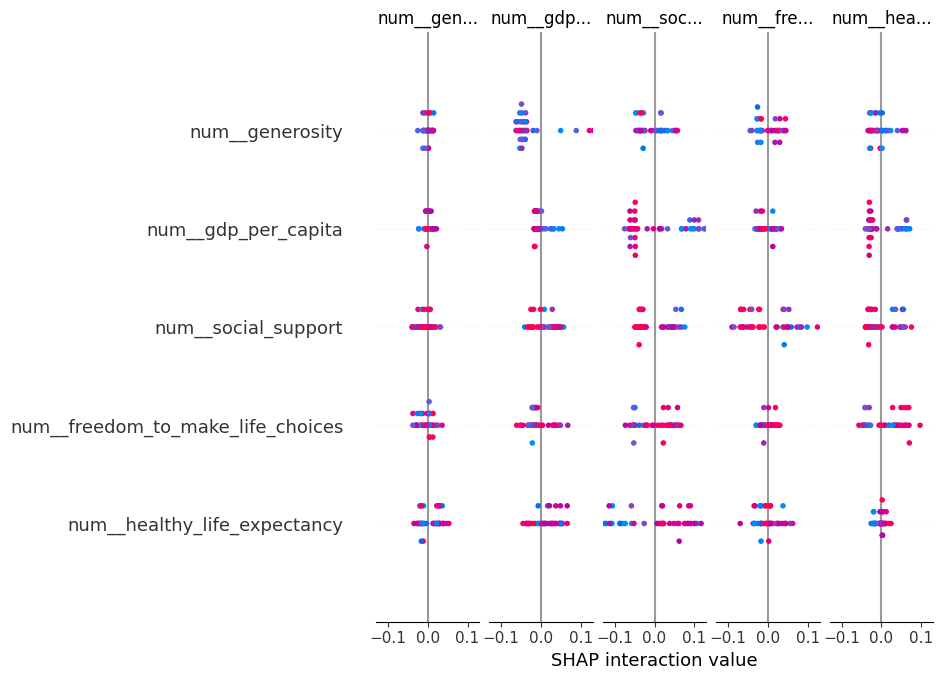

In [40]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt
from scipy import sparse

# Initialize SHAP explainer
# Define an explainer that will help us interpret the model's decisions
# (Hint: Use shap.Explainer with the trained model and X_test data)
X_test_proc = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()
if sparse.issparse(X_test_proc):
    X_test_proc = X_test_proc.toarray()
X_test_proc = np.asarray(X_test_proc, dtype=np.float64)
rf_model = model.named_steps['rf']
explainer = shap.TreeExplainer(rf_model)## Initialize SHAP explainer using the trained model

# Compute SHAP values for X_test
# This step generates Shapley values, which explain how each feature contributes to predictions
shap_values = explainer.shap_values(X_test_proc)## Apply the explainer to X_test

# Generate SHAP summary plot
# This plot will show which features have the most impact on predictions
shap.summary_plot(shap_values, X_test_proc, feature_names=feature_names) # Pass the required parameters to create a summary plot)

# Your cell should output a SHAP summary plot showing the most important features.


<h3> Experimentation

XGB acc: 0.5238095238095238


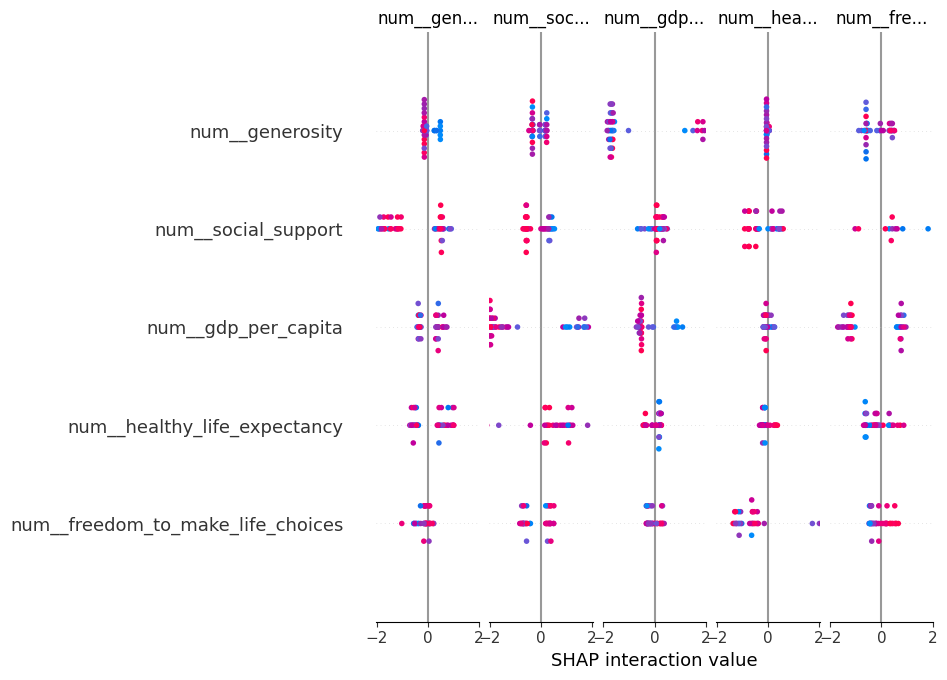

In [41]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb = Pipeline([
    ('prep', preprocessor),
    ('clf', XGBClassifier(
        n_estimators=600, max_depth=6, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        objective='multi:softprob', num_class=5, random_state=42, n_jobs=-1
    ))
])

xgb.fit(X_train, y_train_labels)
print("XGB acc:", xgb.score(X_test, y_test_labels))

# 2) Prepare numeric test matrix + feature names (from the ColumnTransformer)
X_test_proc = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()
if sparse.issparse(X_test_proc):
    X_test_proc = X_test_proc.toarray()
X_test_proc = X_test_proc.astype(np.float64)

# 3) Explain the trained XGBoost (not RandomForest)
xgb_model = xgb.named_steps['clf']        # <-- the XGBClassifier you just fit
explainer = shap.TreeExplainer(xgb_model) # tree-specific explainer

# 4) SHAP values (for multiclass, a list of arrays: one per class)
shap_values = explainer.shap_values(X_test_proc)

# 5) Summary plot (global importance). You can also do plot_type='bar'
shap.summary_plot(shap_values, X_test_proc, feature_names=feature_names)
# shap.summary_plot(shap_values, X_test_proc, feature_names=feature_names, plot_type='bar')
# Your cell should output a SHAP summary plot showing the most important features.

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

Your Code and Answer:

SHAP helps make deep learning models more transparent by showing how individual features contribute to predictions, both at the global and local level. While this provides valuable insights into which factors drive the model’s decisions, the explanations can still be complex and require careful interpretation. In practice, SHAP improves trust and accountability compared to a pure “black box,” but it does not fully demystify the underlying decision-making process, meaning human expertise is still needed to translate these insights into clear justifications.

## 9. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked